In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [132]:
print("There are" ,len(os.listdir("test")) , "test images and ",len(os.listdir("train")), "train images in this project'.")


There are 10357 test images and  10222 train images in this project'.


In [133]:
#Lets read labels.csv file and check whats in that
labels_df = pd.read_csv('labels.csv')
print(labels_df.head())
print(labels_df.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [134]:
train_images_path = "train/"
test_images_path = "test/"
# Check one image from training data
from IPython.display import Image, display
Image( train_images_path + '0a1b0b7df2918d543347050ad8b16051.jpg')

Average Images per breed:85
Total no of breeds:120


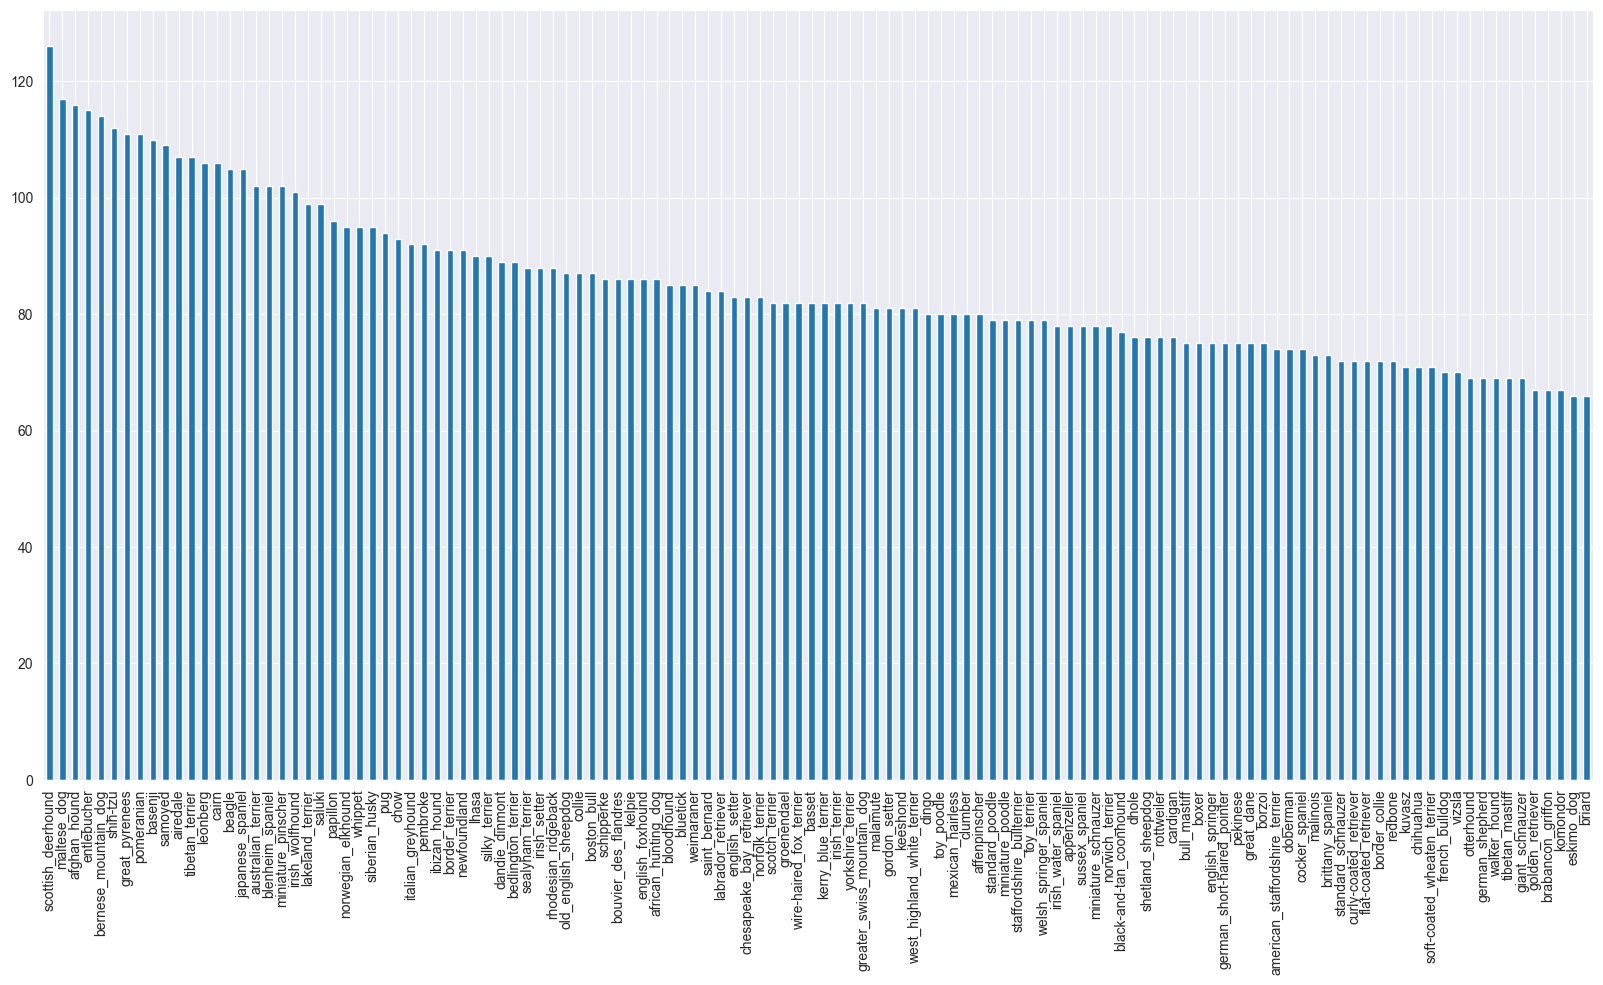

In [135]:
#Check how many images per breed of dog.

labels_df['breed'].value_counts().plot.bar(figsize=(20,10))
print(f"Average Images per breed:{int(labels_df['breed'].value_counts().sum()/len(labels_df['breed'].unique()))}")
print(f"Total no of breeds:{len(labels_df['breed'].unique())}")

Process Annd Train & Test Data

In [136]:
filenames = [train_images_path + fname + '.jpg' for fname in labels_df['id']]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [137]:
# Create class names array
class_names = labels_df['breed'].unique()
class_names[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog'], dtype=object)

In [138]:
target_labels = [breed for breed in labels_df['breed']]
target_labels[:10]


['boston_bull',
 'dingo',
 'pekinese',
 'bluetick',
 'golden_retriever',
 'bedlington_terrier',
 'bedlington_terrier',
 'borzoi',
 'basenji',
 'scottish_deerhound']

In [139]:
# Example: Turn one label into array of boolean
print(target_labels[0])
target_labels[0] == class_names

boston_bull


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [140]:
#Lets do for all the labels

target_labels_encoded = [label == np.array(class_names) for label in target_labels]
target_labels_encoded[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [141]:
# Example: Turning a boolean array into integers
print(target_labels[0]) # original label
print(np.where(class_names == target_labels[0])[0][0]) # index where label occurs
print(target_labels_encoded[0].argmax()) # index where label occurs in boolean array
print(target_labels_encoded[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Split Train & Validation Data

In [142]:
from sklearn.model_selection import train_test_split

# Experiment with a small dataset of 2000 images
NUM_IMAGES = 2000

# Split data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(filenames[:NUM_IMAGES], target_labels_encoded[:NUM_IMAGES], test_size=0.3, random_state=42)

# Further split the temporary data into validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the lengths of the sets
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 1400
Validation set size: 300
Test set size: 300


In [143]:
#Check our the training data

X_train[0], Y_train[0]

('train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]))

## Preprocess the Dataset in Tensorflow Format

Image Shape: (375, 500, 3)


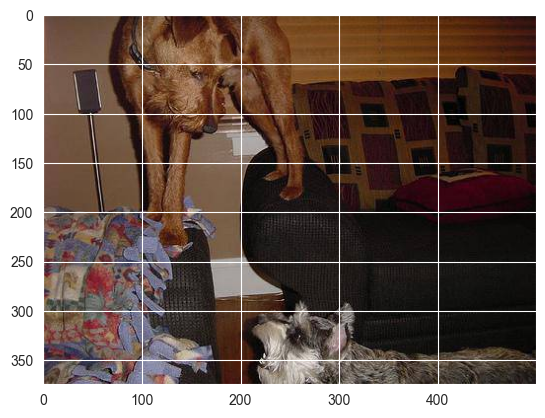

In [144]:
#Random image and its shape
from matplotlib.pyplot import imread

img = imread(X_train[0])
plt.imshow(img)
print(f"Image Shape: {img.shape}")

In [145]:
tf.constant(img)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[140, 104,  88],
        [122,  89,  72],
        [108,  74,  62],
        ...,
        [ 23,  19,  18],
        [ 23,  19,  18],
        [ 23,  19,  18]],

       [[141, 105,  89],
        [123,  90,  73],
        [109,  75,  63],
        ...,
        [ 19,  13,  13],
        [ 19,  13,  13],
        [ 19,  13,  13]],

       [[143, 107,  91],
        [125,  92,  75],
        [111,  77,  65],
        ...,
        [ 20,  10,   9],
        [ 20,  10,   9],
        [ 20,  10,   9]],

       ...,

       [[ 66,  43,  35],
        [ 77,  54,  46],
        [ 71,  49,  38],
        ...,
        [ 31,  25,  25],
        [ 29,  23,  23],
        [ 28,  22,  22]],

       [[ 66,  43,  35],
        [ 87,  64,  56],
        [ 85,  63,  52],
        ...,
        [ 32,  26,  26],
        [ 30,  24,  24],
        [ 28,  22,  22]],

       [[ 69,  46,  38],
        [100,  77,  69],
        [101,  79,  68],
        ...,
        [ 30,  24,  2

In [146]:
tf.image.convert_image_dtype(img, tf.float32)

<tf.Tensor: shape=(375, 500, 3), dtype=float32, numpy=
array([[[0.54901963, 0.40784317, 0.34509805],
        [0.4784314 , 0.34901962, 0.28235295],
        [0.42352945, 0.2901961 , 0.24313727],
        ...,
        [0.09019608, 0.07450981, 0.07058824],
        [0.09019608, 0.07450981, 0.07058824],
        [0.09019608, 0.07450981, 0.07058824]],

       [[0.5529412 , 0.41176474, 0.34901962],
        [0.48235297, 0.3529412 , 0.28627452],
        [0.427451  , 0.29411766, 0.24705884],
        ...,
        [0.07450981, 0.0509804 , 0.0509804 ],
        [0.07450981, 0.0509804 , 0.0509804 ],
        [0.07450981, 0.0509804 , 0.0509804 ]],

       [[0.56078434, 0.41960788, 0.35686275],
        [0.4901961 , 0.36078432, 0.29411766],
        [0.43529415, 0.3019608 , 0.25490198],
        ...,
        [0.07843138, 0.03921569, 0.03529412],
        [0.07843138, 0.03921569, 0.03529412],
        [0.07843138, 0.03921569, 0.03529412]],

       ...,

       [[0.25882354, 0.16862746, 0.13725491],
        [0.30

In [147]:
IMAGE_SIZE = 224

# Lets write our preprocessing function
def process_image(image_path):
    """
    This function will read image, resize the image and return into TF format.
    Arguments:
        image_path(str): Path of image
    Returns:
        img: Tensor image
    """
    img = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    img = tf.io.decode_image(img, channels =3)
    # Convert the colour channel values from 0-225 values to 0-1 values
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to our desired size (224, 244)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img


In [148]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Processes the image and returns a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label

get_image_label(X_train[10], Y_train[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.39607847, 0.53333336, 0.30588236],
         [0.40000004, 0.5372549 , 0.30980393],
         [0.38823533, 0.5254902 , 0.29803923],
         ...,
         [0.30980393, 0.44705886, 0.23529413],
         [0.35686275, 0.49411768, 0.28235295],
         [0.3803922 , 0.5176471 , 0.30588236]],
 
        [[0.3803922 , 0.5176471 , 0.2901961 ],
         [0.39607847, 0.53333336, 0.30588236],
         [0.4039216 , 0.5411765 , 0.3137255 ],
         ...,
         [0.2901961 , 0.40000004, 0.20000002],
         [0.31764707, 0.427451  , 0.227451  ],
         [0.33333334, 0.45098042, 0.24705884]],
 
        [[0.35686275, 0.49803925, 0.25882354],
         [0.35686275, 0.49803925, 0.25882354],
         [0.37254903, 0.5137255 , 0.27450982],
         ...,
         [0.35686275, 0.41960788, 0.24313727],
         [0.38431376, 0.45882356, 0.2784314 ],
         [0.3647059 , 0.45098042, 0.26666668]],
 
        ...,
 
        [[0.2627451 , 0.3372549 

In [150]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_val, Y_val, valid_data= True)
test_data = create_data_batches(X_test, Y_test)

Creating Training Data
Creating Validation data
Creating Training Data


In [151]:
sample =next(iter(train_data))
sample[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

Visualizing Images

In [152]:
import matplotlib.pyplot as plt

def show_images(images, label):
    """
    Display 25 Images with labels.
    """
    #Setup the figure
    plt.figure(figsize = (12,12))
    for i in range(0,25):
        ax = plt.subplot(5, 5, i+1)

        plt.imshow(images[i])

        plt.title(class_names[tf.argmax(label[i])])

        plt.axis("off")


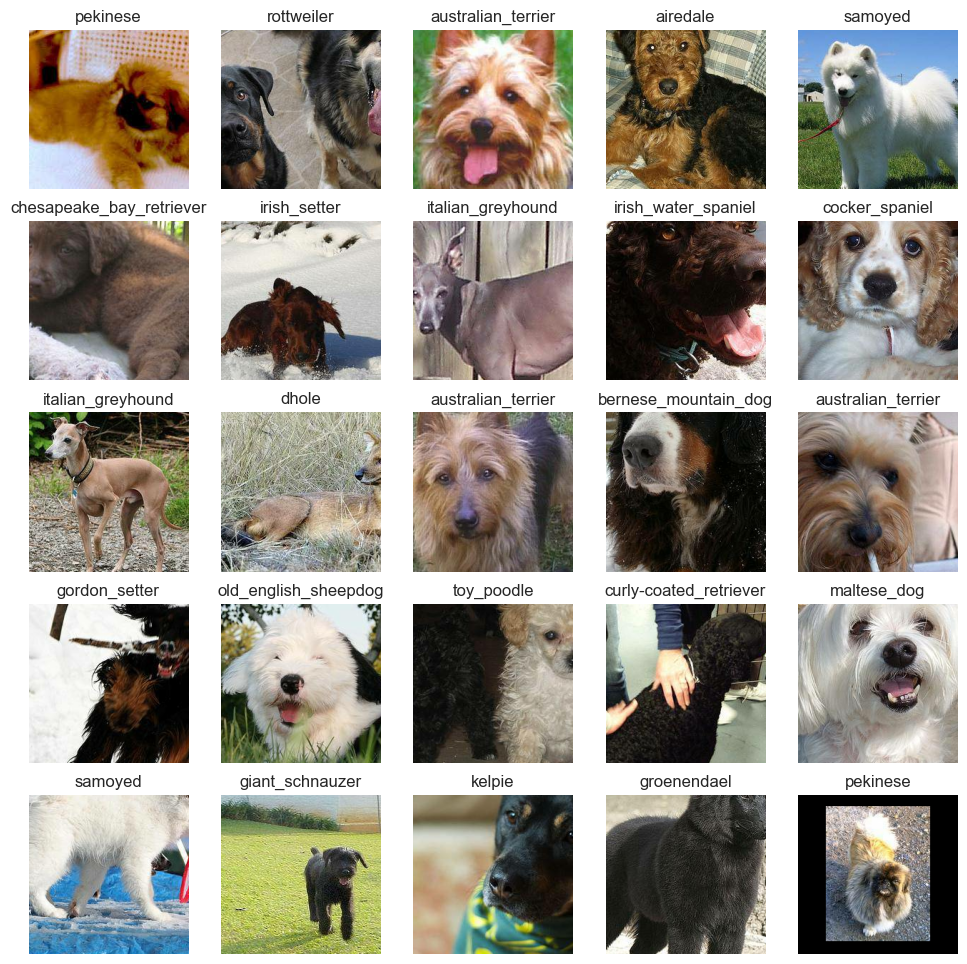

In [153]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

In [154]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_images(val_images, val_labels)

# Creating a Model

In [155]:
import tensorflow as tf
from tensorflow.keras import layers

def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                                classes = len(class_names))
    base_model.trainable = False

    inputs = layers.Input(shape = (224,224,3))
    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling")(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)


    ModelDogBreed = tf.keras.Model(inputs, outputs)

    ModelDogBreed.compile(loss = "categorical_crossentropy",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["accuracy"])

    return ModelDogBreed

In [156]:
model = create_model()

# Callbacks

EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, baseline=None, restore_best_weights=True
)

In [157]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


model_checkpoint = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_loss', mode='min', verbose=1)
ModelDogBreed_History = model.fit(train_data,
                                  steps_per_epoch = len(train_data),
                                  epochs = 10,
                                  validation_data= valid_data,
                                  validation_steps = len(valid_data),
                                  callbacks = [model_checkpoint])
best_model = load_model('best_model.h5')


Epoch 1/10
44/44 [==============================] - ETA: 0s - loss: 4.3038 - accuracy: 0.1286
Epoch 1: val_loss improved from inf to 3.10282, saving model to best_model.h5
44/44 [==============================] - 23s 457ms/step - loss: 4.3038 - accuracy: 0.1286 - val_loss: 3.1028 - val_accuracy: 0.2967
Epoch 2/10
44/44 [==============================] - ETA: 0s - loss: 1.9220 - accuracy: 0.5821
Epoch 2: val_loss improved from 3.10282 to 2.16969, saving model to best_model.h5
44/44 [==============================] - 19s 437ms/step - loss: 1.9220 - accuracy: 0.5821 - val_loss: 2.1697 - val_accuracy: 0.4767
Epoch 3/10
44/44 [==============================] - ETA: 0s - loss: 1.0369 - accuracy: 0.8036
Epoch 3: val_loss improved from 2.16969 to 1.87414, saving model to best_model.h5
44/44 [==============================] - 19s 427ms/step - loss: 1.0369 - accuracy: 0.8036 - val_loss: 1.8741 - val_accuracy: 0.5333
Epoch 4/10
44/44 [==============================] - ETA: 0s - loss: 0.6175 - acc

In [158]:
model.evaluate(valid_data)

10/10 [==============================] - 3s 295ms/step - loss: 1.5417 - accuracy: 0.5867


[1.5417031049728394, 0.5866666436195374]

# Confusion Matrix

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_pred = np.argmax(predictions, axis=1)
# True Labels
y_true = np.argmax(Y_test, axis=1)

# Unique Labels
num_unique_labels = len(np.unique(y_true))

#Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(num_unique_labels))


plt.figure(figsize=(120, 120))

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_unique_labels), yticklabels=np.arange(num_unique_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#  Loss Curves

In [160]:
def plot_loss_curves(history):

    "Returns separate loss curves for training and validation metrics."
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

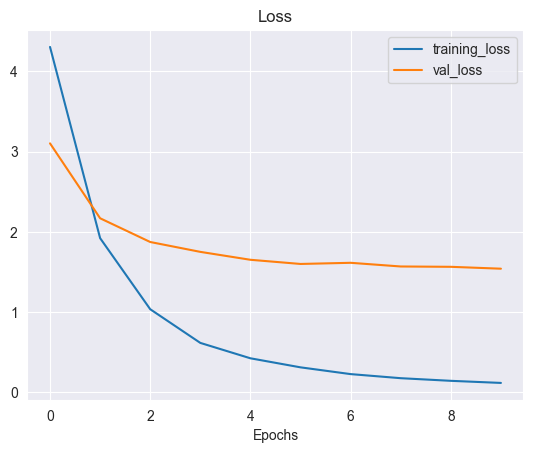

In [161]:
plot_loss_curves(ModelDogBreed_History)

## Make prediction on the validation data

In [162]:

predictions = model.predict(valid_data)
predictions

10/10 [==============================] - 4s 300ms/step


array([[2.15985859e-03, 1.83543749e-03, 6.89209901e-06, ...,
        5.88603552e-06, 9.77280251e-07, 4.40748081e-05],
       [1.09446319e-02, 2.17063807e-05, 4.76490413e-06, ...,
        1.90628907e-05, 3.36413586e-06, 8.77686034e-05],
       [1.08498112e-04, 4.02253791e-04, 1.26074992e-05, ...,
        2.20087823e-05, 2.47396438e-05, 2.61891473e-05],
       ...,
       [2.40355337e-04, 6.09001727e-04, 1.47684928e-04, ...,
        8.58397761e-05, 9.07667854e-04, 7.21901730e-02],
       [9.74016293e-05, 4.64604545e-06, 1.55361471e-04, ...,
        2.70237888e-05, 1.36973336e-04, 4.82154610e-05],
       [1.19502525e-04, 1.47100029e-04, 2.39065571e-06, ...,
        1.29120781e-06, 1.94760082e-06, 3.04929108e-06]], dtype=float32)

In [163]:
predictions.shape

(300, 120)

In [164]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {class_names[np.argmax(predictions[0])]}") # the predicted label

[2.15985859e-03 1.83543749e-03 6.89209901e-06 1.39273109e-03
 7.69172129e-06 1.72549961e-04 4.44810052e-04 4.46122343e-04
 8.41370958e-04 1.26650746e-04 1.71525360e-04 7.13426516e-06
 1.16580929e-06 1.27869903e-03 1.59777483e-05 3.40480765e-05
 8.87514761e-06 1.47198407e-05 7.96099721e-06 9.71353002e-05
 5.13156876e-03 2.93689172e-05 1.17891261e-06 7.48649882e-06
 7.69382750e-04 2.12737781e-04 2.71419383e-04 1.58792755e-04
 5.42107155e-05 1.20359393e-04 1.45873092e-02 4.88343649e-03
 2.39304805e-04 1.04091433e-03 2.86681552e-05 3.71414095e-01
 1.10326337e-05 1.39534415e-04 1.20457109e-04 1.30648405e-04
 1.04675055e-05 1.80156167e-05 2.32641432e-05 6.95157284e-03
 1.38991800e-05 4.20883543e-06 7.79403138e-07 4.83466392e-05
 5.03798202e-03 1.57928298e-04 2.99107178e-05 1.04088755e-03
 3.38503355e-06 1.34949849e-04 3.52969393e-04 3.78380180e-04
 1.35751382e-01 5.00290625e-05 5.96076855e-03 5.29507175e-04
 2.38602675e-04 7.30691245e-04 2.90768512e-05 1.08242544e-04
 1.53208186e-03 1.126349

In [165]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return class_names[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'siberian_husky'

In [166]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays
    of images and labels.
    """
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(class_names[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.3529412 , 0.4784314 , 0.15294118],
         [0.2509804 , 0.38823533, 0.05882353],
         [0.3803922 , 0.5176471 , 0.18823531],
         ...,
         [0.5254902 , 0.6509804 , 0.4039216 ],
         [0.56078434, 0.6862745 , 0.43921572],
         [0.47058827, 0.59607846, 0.34117648]],
 
        [[0.38431376, 0.5176471 , 0.1764706 ],
         [0.45882356, 0.6117647 , 0.2627451 ],
         [0.5294118 , 0.68235296, 0.33333334],
         ...,
         [0.4666667 , 0.6039216 , 0.3529412 ],
         [0.50980395, 0.64705884, 0.39607847],
         [0.42352945, 0.56078434, 0.30980393]],
 
        [[0.40000004, 0.5411765 , 0.18823531],
         [0.52156866, 0.6745098 , 0.31764707],
         [0.48235297, 0.63529414, 0.2784314 ],
         ...,
         [0.44705886, 0.5882353 , 0.3372549 ],
         [0.47450984, 0.6156863 , 0.3647059 ],
         [0.454902  , 0.59607846, 0.34509805]],
 
        ...,
 
        [[0.8470589 , 0.9176471 , 0.9333334 ],
         [0.8588236 , 0.92549026, 0.96470

In [167]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth label and image for sample n.
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.title("{} {:2.0f}% ({})".format(pred_label,
                                        np.max(pred_prob)*100,
                                        true_label),
              color=color)



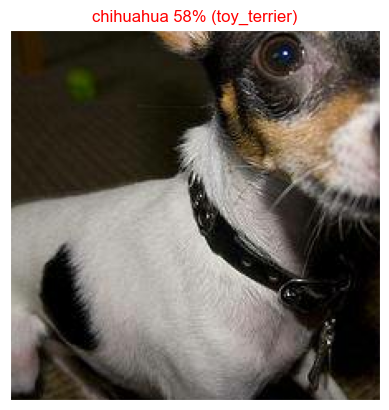

In [168]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [169]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plots the top 10 highest prediction confidences along with
    the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = class_names[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass


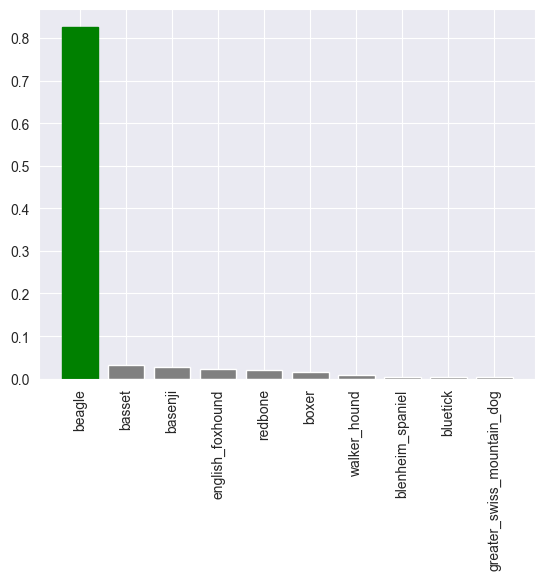

In [170]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

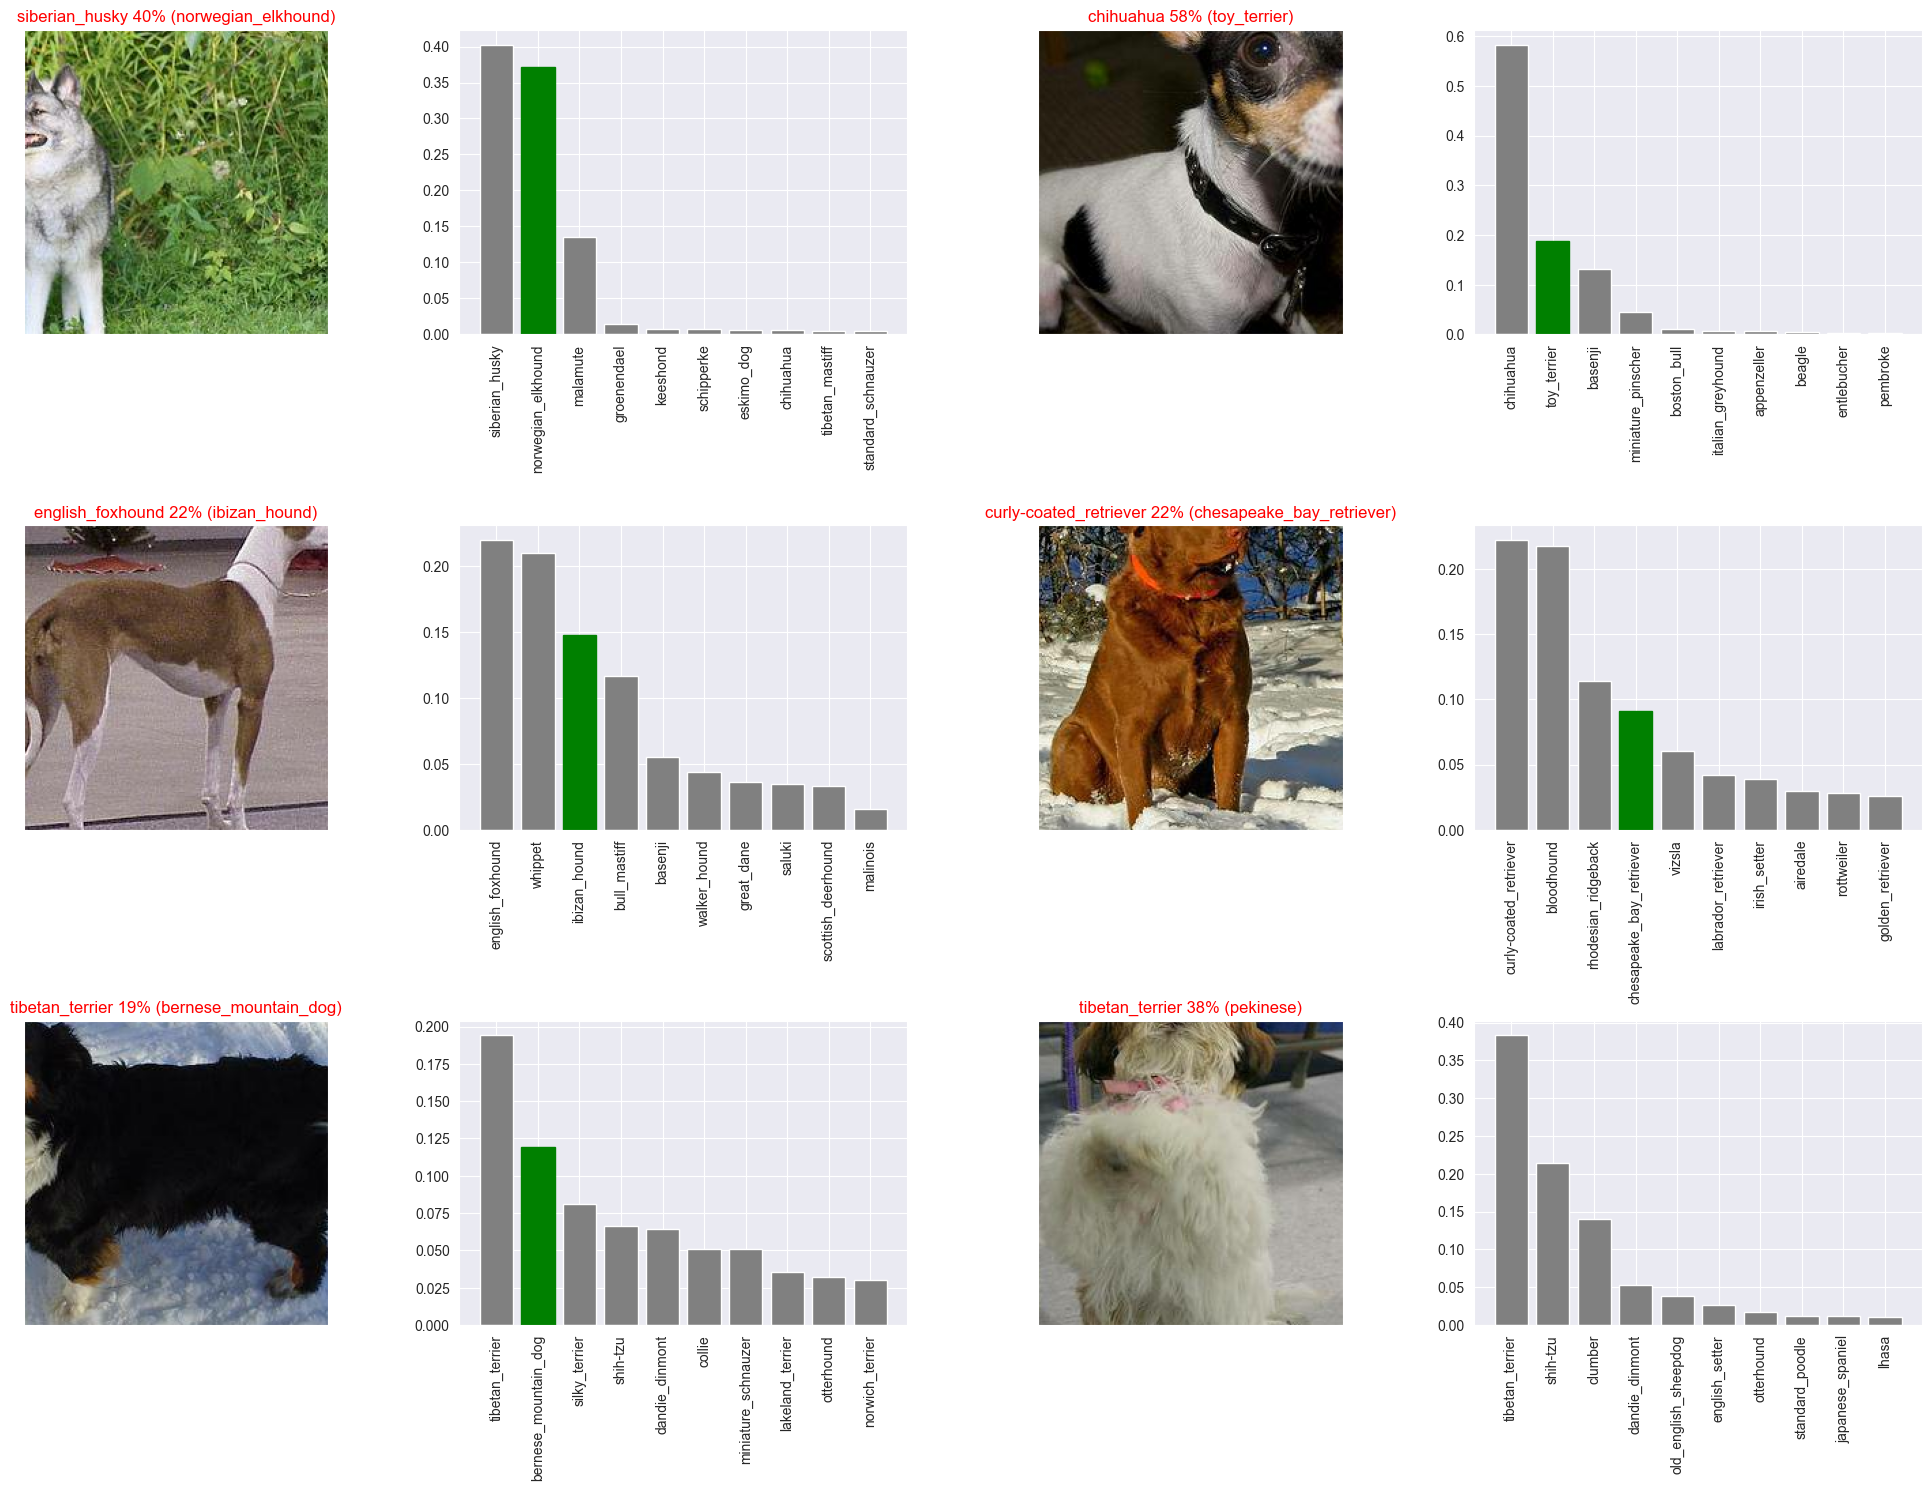

In [173]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()